<a href="https://colab.research.google.com/github/Animesh-Guchhait/Taming-Text-with-the-SVD/blob/main/Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries

In [ ]:
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords, words
from nltk import wordpunct_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from copy import deepcopy
import random
from sklearn.feature_extraction.text import CountVectorizer
from oxforddictionaries.words import OxfordDictionaries
import scipy.sparse as sp
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA 

In [ ]:
en_words = set(words.words())

In [ ]:
# Function to remove stop words
def remove_sw(words):
    stop_words = set(stopwords.words('english'))
    return [i for i in words if i not in stop_words]

In [ ]:
def text_clean(file):
    file = deepcopy(file)
    file = ' '.join( [w for w in file.split() if len(w)>1] ).strip()
    file = re.sub(" \d+", " ", file).strip()
    return file
def noneng_rm(file_words):
    return [w for w in file_words if w.lower() in en_words or not w.isalpha()]
def rem_words(df,words):
    temp = []
    for word in words:
        try:
            if (df.loc[word,:] == 0).count() > 1:
                temp.append(word)
        except:
            pass
    return temp

In [ ]:
def rem_one(df):
    df = deepcopy(df)
    rows_to_drop = []
    for i in df.iterrows():
        n = 0
        for j in df.columns:
            if df[j][i] != 0:
                n += 1
        if n <= 5:
            rows_to_drop.append(i)
    return df.drop(rows_to_drop, inplace=False, axis=0)

In [ ]:
def stem_words(words):
    ps = PorterStemmer()
    for i in range(len(words)):
        words[i] = ps.stem(words[i])
    return words

In [ ]:
def syns(words):
    lemmatizer = WordNetLemmatizer()
    for i in range(len(words)):
        words[i] = lemmatizer.lemmatize(words[i])
    return words

In [ ]:
def file_formatting(filenames):
    fnames = deepcopy(filenames)
    files = []
    c = 0
    for filename in fnames:
        if c ==3000:
            break
        try:
            #if filenames[0][-3:] != 'txt':
            #print(7/0)
            file = open(filename,'r').read()
            file = file.replace('\n', ' ')
            file = re.sub(r'[^a-zA-Z0-9 ]', ' ', file)
            file = re.sub(' +', ' ', file)
            file = file.strip()
            files.append(file)
            c += 1
        except:
            ind = filenames.index(filename)
            filenames.pop(ind)
    return files

In [ ]:
'''
def PCA(A , n_components):
    mean_cols = A.mean(axis=0)
    B = A - mean_cols
    C = B.T@B
    eigen_values , eigen_vectors = np.linalg.eig(C)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:n_components]
    df_reduced = np.dot(eigenvector_subset.transpose() , B.T).transpose()
    print(pd.DataFrame(mean_cols))
    return df_reduced, sorted_eigenvalue
'''

'\ndef PCA(A , n_components):\n    mean_cols = A.mean(axis=0)\n    B = A - mean_cols\n    C = B.T@B\n    eigen_values , eigen_vectors = np.linalg.eig(C)\n    sorted_index = np.argsort(eigen_values)[::-1]\n    sorted_eigenvalue = eigen_values[sorted_index]\n    sorted_eigenvectors = eigen_vectors[:,sorted_index]\n    eigenvector_subset = sorted_eigenvectors[:,0:n_components]\n    df_reduced = np.dot(eigenvector_subset.transpose() , B.T).transpose()\n    print(pd.DataFrame(mean_cols))\n    return df_reduced, sorted_eigenvalue\n'

In [ ]:
def SVD(df , n_components):
    u , sigma, vt = np.linalg.svd(df)
    df_svd = np.transpose(np.transpose(u[:,:n_components])@np.array(df))
    return df_svd

In [ ]:
def svd_var(df):
    u,s,vt = np.linalg.svd(df)
    var_explained = np.round(s**2/np.sum(s**2), decimals=3)
    return var_explained, s

In [ ]:
def tdf_matrix(files, filename,words):
    corpus = files
    df = pd.DataFrame(data=corpus, columns=['sentences'])
    
    vectorizer = CountVectorizer(vocabulary=words, min_df=0,
                             stop_words=frozenset(), token_pattern=r"(?u)\b\w+\b")
    X = vectorizer.fit_transform(df['sentences'].values)

    df = pd.DataFrame(data=np.transpose(X.toarray()), index=vectorizer.get_feature_names(), columns = filenames)

    return df.T

___

In [ ]:
filenames = os.listdir()
files = []

In [ ]:
files = file_formatting(filenames)
len(files)

261

In [ ]:
all_words = []
for i in files:
    all_words +=  i.split()
all_words = set(all_words)

# Unclean Matrix

In [ ]:
tdf = tdf_matrix(files, filenames, all_words)
tdf

,0,00,000,0000,00000,000000,0000000,00000000,000000000000,0000000000000000,...,zs,zsbhdr,zsdata,zsh,zshhdr,zu,zur,zx,zzzz,zzzzz
24hrs.txt,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25th_ann.uni,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3drotate.txt,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3dshade.txt,16,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4dostips.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ymodem.txt,14,5,0,0,0,0,0,6,0,0,...,1,0,0,0,0,0,0,0,0,0
zappvowl.txt,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zen_life.txt,5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zipwarn.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


___

## Cleaning text

In [ ]:
all_words_cleaned = []
all_words_cleaned = text_clean(' '.join(all_words)).split()

In [ ]:
all_words_cleaned = noneng_rm(all_words_cleaned)
#all_words_cleaned = rem_words(tdf, all_words_cleaned)

In [ ]:
len(all_words)

77959

In [ ]:
all_words_cleaned = set(all_words_cleaned)

In [ ]:
len(all_words_cleaned)

27572

___

## TDF matrix for cleaned text

In [ ]:
tdf_cleaned = tdf_matrix(files, filenames, all_words_cleaned)
tdf_cleaned

,A,A0,A00,A000,A0000,A000H,A000h,A001,A00147,A00150,...,zero,zip,zippy,zmodem6,zone,zoning,zoo,zoology,zooplan1,zox3d15
24hrs.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25th_ann.uni,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3drotate.txt,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3dshade.txt,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
4dostips.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ymodem.txt,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
zappvowl.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zen_life.txt,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,1,1,0,0
zipwarn.txt,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0


## SVD of cleaned text

<AxesSubplot:xlabel='SV', ylabel='Percent Variance Explained'>

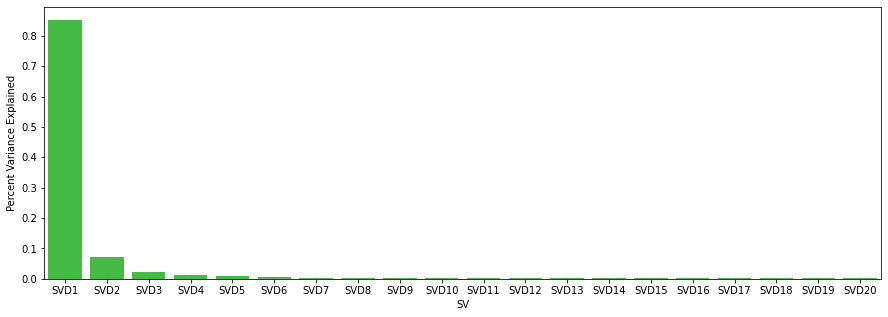

In [ ]:
plt.figure(figsize = (15,5))
var_cleaned, s_cleaned = svd_var(tdf_cleaned)
lst = ['SVD'+str(i+1) for i in range(len(var_cleaned))]
svd_var_cleaned = pd.DataFrame({'Percent Variance Explained':var_cleaned[:20], 'SV':lst[:20]})
sns.barplot(x='SV',y="Percent Variance Explained", data=svd_var_cleaned, color="limegreen")

### Singular values

In [ ]:
pd.DataFrame(np.diag(s_cleaned))

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
0,24990.051238,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.000000,7325.092707,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.000000,0.000000,3888.657997,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.000000,0.000000,0.000000,3133.654042,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,2767.623917,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.578137,0.000000,0.00000,0.000000,0.000000
257,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,11.973911,0.00000,0.000000,0.000000
258,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,11.60602,0.000000,0.000000
259,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,8.838437,0.000000


In [ ]:
svd_cleaned = SVD(tdf_cleaned.T, 5)
pd.DataFrame(svd_cleaned)

,0,1,2,3,4
0,-200.395143,-6.239323,-32.097579,1.651257,-15.774340
1,-781.229752,29.232028,-89.337165,-21.710737,-100.457829
2,-206.723825,-4.994054,-17.559649,-8.295267,-7.269077
3,-151.728144,-6.341379,-8.844330,-5.555706,-8.853609
4,-28.111155,0.228265,-4.115711,-2.591348,-0.283047
...,...,...,...,...,...
256,-609.882284,-18.302806,36.840564,35.264898,-96.575878
257,-9.806243,1.102185,-0.845046,1.273961,0.144462
258,-1782.481921,104.514352,16.179770,-42.077466,-238.082908
259,-38.077811,-0.153943,-6.265807,-0.693215,-0.954861


## PCA of cleaned text

In [ ]:
pca_cleaned = PCA(n_components = 20)

In [ ]:
pca_cleaned.fit(tdf_cleaned)
variance_cleaned = pca_cleaned.explained_variance_ratio_

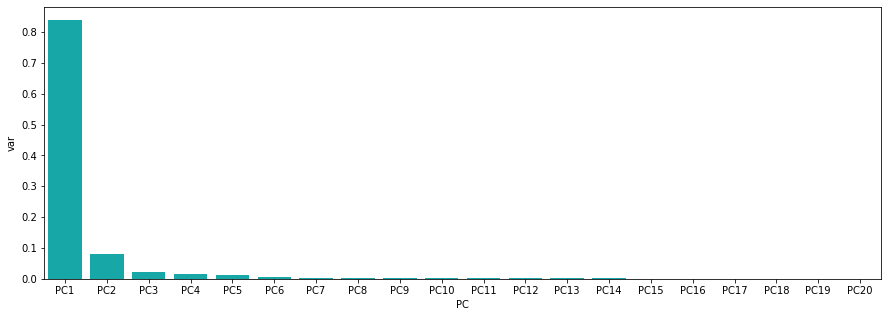

In [ ]:
plt.figure(figsize=(15, 5))
lst = ['PC'+str(i+1) for i in range(len(list(variance_cleaned)[:20]))]
pc_var = pd.DataFrame({'var':list(variance_cleaned)[:20],
             'PC':lst[:20]})
sns.barplot(x='PC',y="var", 
           data=pc_var, color="c");

In [ ]:
pd.DataFrame(np.diag(pca_cleaned.singular_values_))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,23685.275978,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000
1,0.000000,7314.445734,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000
2,0.000000,0.000000,3886.006138,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000
3,0.000000,0.000000,0.000000,3131.78589,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000
4,0.000000,0.000000,0.000000,0.00000,2700.941452,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000
5,0.000000,0.000000,0.000000,0.00000,0.000000,1988.056571,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000
6,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1467.226861,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000
7,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1258.40897,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000
8,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,1224.630223,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000
9,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,1078.375486,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000


In [ ]:
pd.DataFrame(pca_cleaned.fit_transform(tdf_cleaned)).loc[:,[0,1]]

,0,1
0,-292.918932,-31.072912
1,285.788778,6.649400
2,-286.387903,-29.659823
3,-341.311268,-31.291371
4,-464.820186,-25.357259
...,...,...
256,115.909491,-41.173653
257,-483.113684,-24.580169
258,1284.538294,86.593409
259,-454.870089,-25.693361


___

## Removing stop words

In [ ]:
all_words_sw = set(remove_sw(list(all_words_cleaned)))

In [ ]:
len(all_words_sw)

27440

### TDF matrix after removing stop words

In [ ]:
tdf_sw = tdf_matrix(files, filenames, all_words_sw)
tdf_sw

,A,A0,A00,A000,A0000,A000H,A000h,A001,A00147,A00150,...,zero,zip,zippy,zmodem6,zone,zoning,zoo,zoology,zooplan1,zox3d15
24hrs.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25th_ann.uni,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3drotate.txt,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3dshade.txt,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
4dostips.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ymodem.txt,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
zappvowl.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zen_life.txt,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,1,1,0,0
zipwarn.txt,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0


## SVD 

<AxesSubplot:xlabel='SV', ylabel='Percent Variance Explained'>

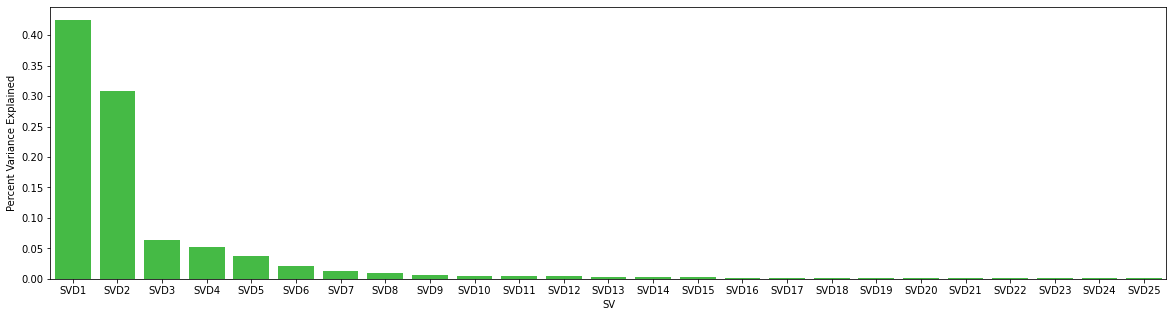

In [ ]:
plt.figure(figsize = (20,5))
var_sw, s_sw = svd_var(tdf_sw.T)
lst = ['SVD'+str(i+1) for i in range(len(var_sw))]
svd_var_sw = pd.DataFrame({'Percent Variance Explained':var_sw[:25], 'SV':lst[:25]})
sns.barplot(x='SV',y="Percent Variance Explained", data=svd_var_sw, color="limegreen")

In [ ]:
pd.DataFrame(np.diag(s_sw))

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
0,6942.774026,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,5927.55838,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.00000,2688.900849,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.00000,0.000000,2456.055501,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.00000,0.000000,0.000000,2055.612268,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.653808,0.000000,0.000000,0.000000,0.000000
257,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,10.563537,0.000000,0.000000,0.000000
258,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,8.046286,0.000000,0.000000
259,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,7.550403,0.000000


In [ ]:
svd_sw = SVD(tdf_sw.T, 4)
pd.DataFrame(svd_sw)

,0,1,2,3
0,-7.063461,-14.381397,8.127098,-4.670061
1,-29.606603,-59.069227,23.931515,-10.564921
2,-9.677793,-24.052669,11.191773,0.072120
3,-6.611708,-16.844336,2.520456,-0.203060
4,-2.524481,-5.436443,0.958016,-0.307073
...,...,...,...,...
256,-38.296910,-85.288068,17.352862,1.716765
257,-1.814845,-4.087412,0.973359,0.286043
258,-50.703216,-116.570425,24.461958,-15.104094
259,-2.614741,-3.811085,1.171633,-0.090337


## PCA 

In [ ]:
pca_sw = PCA(n_components = 20)

In [ ]:
pca_sw.fit(tdf_sw)
variance_sw = pca_sw.explained_variance_ratio_

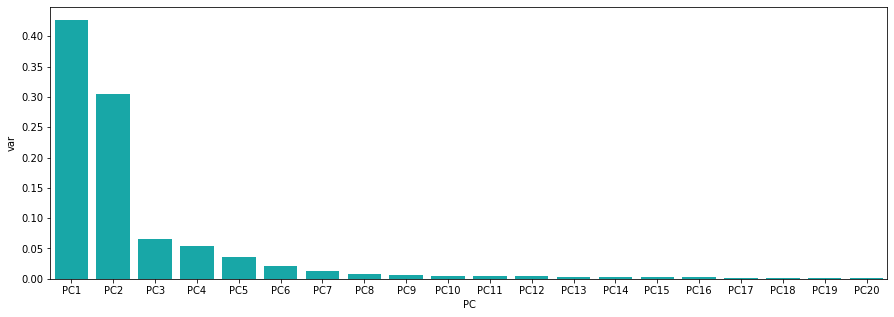

In [ ]:
plt.figure(figsize=(15, 5))
lst = ['PC'+str(i+1) for i in range(len(list(variance_sw)[:20]))]
pc_var = pd.DataFrame({'var':list(variance_sw)[:20],
             'PC':lst[:20]})
sns.barplot(x='PC',y="var", 
           data=pc_var, color="c");

In [ ]:
pd.DataFrame(np.diag(pca_sw.singular_values_))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,6870.572717,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,5799.021381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,2680.491154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,2454.603297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,2005.380915,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,1545.253265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1184.188034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,967.253374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,823.746134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,695.408508,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
pd.DataFrame(pca_sw.fit_transform(tdf_cleaned)).loc[:,[0,1]]

,0,1
0,-292.918932,-31.072912
1,285.788778,6.649400
2,-286.387903,-29.659823
3,-341.311268,-31.291371
4,-464.820186,-25.357259
...,...,...
256,115.909491,-41.173653
257,-483.113684,-24.580169
258,1284.538294,86.593409
259,-454.870089,-25.693361


___

## Mapping stem words and synonyms to one word

In [ ]:
all_words_stem = set(stem_words(list(all_words_sw)))

In [ ]:
len(all_words_stem)

17249

In [ ]:
all_words_syns = set(syns(list(all_words_stem)))

In [ ]:
len(all_words_syns)

17223

### TDF matrix 

In [ ]:
tdf_syns = tdf_matrix(files, filenames, all_words_syns)
tdf_syns

,A,A0,A1,A2,A3,A4,A5,A6,A7,A8,...,zvj9,zvrccvb0zwn,zw0,zw2riw,zw6l,zwd1gz,zx32,zyxv32b,zz3,zzagfe4z
24hrs.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25th_ann.uni,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3drotate.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3dshade.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4dostips.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ymodem.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zappvowl.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zen_life.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zipwarn.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## SVD 

<AxesSubplot:xlabel='SV', ylabel='Percent Variance Explained'>

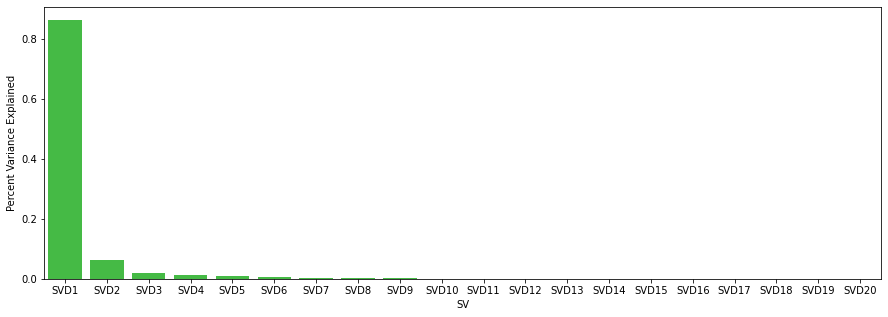

In [ ]:
plt.figure(figsize = (15,5))
var_syns, s_syns = svd_var(tdf_syns.T)
lst = ['SVD'+str(i+1) for i in range(len(var_syns))]
svd_var_syns = pd.DataFrame({'Percent Variance Explained':var_syns[:20], 'SV':lst[:20]})
sns.barplot(x='SV',y="Percent Variance Explained", data=svd_var_syns, color="limegreen")

In [ ]:
pd.DataFrame(np.diag(s_syns))

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
0,20471.474895,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
1,0.000000,5545.081575,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
2,0.000000,0.000000,2996.854249,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,2572.530011,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,2221.023126,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.584425,0.00000,0.000000,0.000000,0.000000
257,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,7.60978,0.000000,0.000000,0.000000
258,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,7.460322,0.000000,0.000000
259,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,6.127487,0.000000


In [ ]:
svd_syns = SVD(tdf_syns.T, 3)
pd.DataFrame(svd_syns)

,0,1,2
0,-170.284467,-5.793693,28.783661
1,-619.033026,3.294454,47.941532
2,-179.223676,-5.463429,15.498198
3,-130.300065,-3.019853,8.875218
4,-21.041973,-0.250023,4.940859
...,...,...,...
256,-523.938847,-16.258904,-25.318868
257,-7.110034,0.625508,1.829957
258,-1417.754102,-40.177913,14.348936
259,-27.786743,-0.636962,3.768295


## PCA 

In [ ]:
pca_sw = PCA(n_components = 20)

In [ ]:
pca_sw.fit(tdf_sw)
variance_sw = pca_sw.explained_variance_ratio_

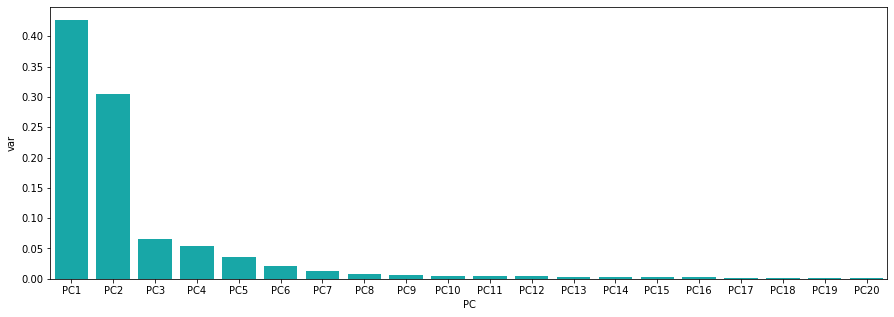

In [ ]:
plt.figure(figsize=(15, 5))
lst = ['PC'+str(i+1) for i in range(len(list(variance_sw)[:20]))]
pc_var = pd.DataFrame({'var':list(variance_sw)[:20],
             'PC':lst[:20]})
sns.barplot(x='PC',y="var", 
           data=pc_var, color="c");

In [ ]:
pd.DataFrame(np.diag(pca_sw.singular_values_))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,6870.572717,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
1,0.000000,5799.021381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
2,0.000000,0.000000,2680.491154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
3,0.000000,0.000000,0.000000,2454.603297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,2005.380915,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,1545.253265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1184.188034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,967.253374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,823.746134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,695.408508,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000


In [ ]:
pd.DataFrame(pca_sw.fit_transform(tdf_cleaned)).loc[:,[0,1]]

,0,1
0,-292.918932,-31.072912
1,285.788778,6.649400
2,-286.387903,-29.659823
3,-341.311268,-31.291371
4,-464.820186,-25.357259
...,...,...
256,115.909491,-41.173653
257,-483.113684,-24.580169
258,1284.538294,86.593409
259,-454.870089,-25.693361
